In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn.objects as so
import matplotlib as plt
# sklearn
# formulaic

In [3]:
datos = pd.read_csv("full_data.csv")

# Procesamiento de datos

## Ejercicio 1

In [4]:
columnas_a_mantener = [
    "station_id",
    "num_bikes_available",
    "num_bikes_disabled",
    "num_docks_available",
    "num_docks_disabled",
    "Date",
    "hora",
    "dia"
]

datos_limpios = datos[columnas_a_mantener].copy()

datos_limpios

,station_id,num_bikes_available,num_bikes_disabled,num_docks_available,num_docks_disabled,Date,hora,dia
0,420,3,1,8,0,2025-04-28,23:28:05,Monday
1,464,11,2,7,0,2025-04-28,23:28:05,Monday
2,420,5,1,6,1,2025-04-29,00:32:59,Tuesday
3,464,11,2,7,0,2025-04-29,00:32:59,Tuesday
4,420,5,1,6,1,2025-04-29,01:13:46,Tuesday
...,...,...,...,...,...,...,...,...
12523,464,1,0,19,0,2026-02-06,14:34:54,Friday
12524,420,3,3,6,0,2026-02-06,15:36:04,Friday
12525,464,1,0,19,0,2026-02-06,15:36:04,Friday
12526,420,1,3,8,0,2026-02-06,16:31:56,Friday


## Ejercicio 2

In [5]:
diccionario_de_traduccion = {
    "station_id": "estacion",
    "num_bikes_available": "bicis_disponibles",
    "num_bikes_disabled": "bicis_rotas",
    "num_docks_available": "puertos_disponibles",
    "num_docks_disabled": "puertos_rotos",
    "Date": "fecha",
    "hora": "horario",
    "dia": "dia_semana"
}

datos_limpios = datos_limpios.rename(columns=diccionario_de_traduccion)

datos_limpios

,estacion,bicis_disponibles,bicis_rotas,puertos_disponibles,puertos_rotos,fecha,horario,dia_semana
0,420,3,1,8,0,2025-04-28,23:28:05,Monday
1,464,11,2,7,0,2025-04-28,23:28:05,Monday
2,420,5,1,6,1,2025-04-29,00:32:59,Tuesday
3,464,11,2,7,0,2025-04-29,00:32:59,Tuesday
4,420,5,1,6,1,2025-04-29,01:13:46,Tuesday
...,...,...,...,...,...,...,...,...
12523,464,1,0,19,0,2026-02-06,14:34:54,Friday
12524,420,3,3,6,0,2026-02-06,15:36:04,Friday
12525,464,1,0,19,0,2026-02-06,15:36:04,Friday
12526,420,1,3,8,0,2026-02-06,16:31:56,Friday


## Ejercicio 3

In [6]:
diccionario_de_dias = {
    "Monday": "Lunes",
    "Tuesday": "Martes",
    "Wednesday": "Miércoles",
    "Thursday": "Jueves",
    "Friday": "Viernes",
    "Saturday": "Sábado",
    "Sunday": "Domingo"
}

datos_limpios["dia_semana"] = datos["dia"].map(diccionario_de_dias)

## Ejercicio 4

In [7]:
datos_limpios.dtypes

estacion                int64
bicis_disponibles       int64
bicis_rotas             int64
puertos_disponibles     int64
puertos_rotos           int64
fecha                  object
horario                object
dia_semana             object
dtype: object

## Ejercicio 5

In [8]:
datos_limpios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   estacion             12528 non-null  int64 
 1   bicis_disponibles    12528 non-null  int64 
 2   bicis_rotas          12528 non-null  int64 
 3   puertos_disponibles  12528 non-null  int64 
 4   puertos_rotos        12528 non-null  int64 
 5   fecha                12528 non-null  object
 6   horario              12528 non-null  object
 7   dia_semana           12528 non-null  object
dtypes: int64(5), object(3)
memory usage: 783.1+ KB


In [9]:
datos_limpios.isna().sum()

estacion               0
bicis_disponibles      0
bicis_rotas            0
puertos_disponibles    0
puertos_rotos          0
fecha                  0
horario                0
dia_semana             0
dtype: int64

No contiene datos faltantes, solo la columna 'traffic' completa, la cual fue eliminada en el ejercicio 1.

## Ejercicio 6

In [10]:
# Extracción de fecha para hacer anio, mes y día, formato yyyy-mm-dd en strings

datos_limpios['anio'] = datos_limpios['fecha'].str[0:4]
datos_limpios['mes']  = datos_limpios['fecha'].str[5:7]
datos_limpios['dia']  = datos_limpios['fecha'].str[8:10]

# Lo mismo para horario pero solo guardo hora
datos_limpios['hora'] = datos_limpios['horario'].str[0:2]


columnas_de_tiempo_transformadas_a_numeros = ['anio', 'mes', 'dia', 'hora']
datos_limpios[columnas_de_tiempo_transformadas_a_numeros] = datos_limpios[columnas_de_tiempo_transformadas_a_numeros].apply(pd.to_numeric)

datos_limpios

,estacion,bicis_disponibles,bicis_rotas,puertos_disponibles,puertos_rotos,fecha,horario,dia_semana,anio,mes,dia,hora
0,420,3,1,8,0,2025-04-28,23:28:05,Lunes,2025,4,28,23
1,464,11,2,7,0,2025-04-28,23:28:05,Lunes,2025,4,28,23
2,420,5,1,6,1,2025-04-29,00:32:59,Martes,2025,4,29,0
3,464,11,2,7,0,2025-04-29,00:32:59,Martes,2025,4,29,0
4,420,5,1,6,1,2025-04-29,01:13:46,Martes,2025,4,29,1
...,...,...,...,...,...,...,...,...,...,...,...,...
12523,464,1,0,19,0,2026-02-06,14:34:54,Viernes,2026,2,6,14
12524,420,3,3,6,0,2026-02-06,15:36:04,Viernes,2026,2,6,15
12525,464,1,0,19,0,2026-02-06,15:36:04,Viernes,2026,2,6,15
12526,420,1,3,8,0,2026-02-06,16:31:56,Viernes,2026,2,6,16


In [11]:
datos_limpios.dtypes

estacion                int64
bicis_disponibles       int64
bicis_rotas             int64
puertos_disponibles     int64
puertos_rotos           int64
fecha                  object
horario                object
dia_semana             object
anio                    int64
mes                     int64
dia                     int64
hora                    int64
dtype: object

## Ejercicio 7

7. Otra forma de manejar las fechas y horas es pasarlas al formato datetime. Para esto, usaremos
el siguiente bloque de c´odigo:
datos_limpios["fecha"] =
pd.to_datetime(datos_limpios["fecha"])
datos_limpios["hora"] =
pd.to_datetime(datos_limpios["hora"]).dt.time

In [12]:
datos_limpios

,estacion,bicis_disponibles,bicis_rotas,puertos_disponibles,puertos_rotos,fecha,horario,dia_semana,anio,mes,dia,hora
0,420,3,1,8,0,2025-04-28,23:28:05,Lunes,2025,4,28,23
1,464,11,2,7,0,2025-04-28,23:28:05,Lunes,2025,4,28,23
2,420,5,1,6,1,2025-04-29,00:32:59,Martes,2025,4,29,0
3,464,11,2,7,0,2025-04-29,00:32:59,Martes,2025,4,29,0
4,420,5,1,6,1,2025-04-29,01:13:46,Martes,2025,4,29,1
...,...,...,...,...,...,...,...,...,...,...,...,...
12523,464,1,0,19,0,2026-02-06,14:34:54,Viernes,2026,2,6,14
12524,420,3,3,6,0,2026-02-06,15:36:04,Viernes,2026,2,6,15
12525,464,1,0,19,0,2026-02-06,15:36:04,Viernes,2026,2,6,15
12526,420,1,3,8,0,2026-02-06,16:31:56,Viernes,2026,2,6,16


In [13]:
datos_limpios["fecha"] = pd.to_datetime(datos_limpios["fecha"])
datos_limpios["horario"] = pd.to_datetime(datos_limpios["horario"]).dt.time #Problema acá: dice hora pero eso transforma todo en 00:00:00, y con horario da el siguiente error:
'''
UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  datos_limpios["horario"] = pd.to_datetime(datos_limpios["horario"]).dt.time
'''

C:\Users\Usuario\AppData\Local\Temp\ipykernel_20648\681115057.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  datos_limpios["horario"] = pd.to_datetime(datos_limpios["horario"]).dt.time #Problema acá: dice hora pero eso transforma todo en 00:00:00, y con horario da el siguiente error:


'\nUserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.\n  datos_limpios["horario"] = pd.to_datetime(datos_limpios["horario"]).dt.time\n'

In [14]:
datos_limpios

,estacion,bicis_disponibles,bicis_rotas,puertos_disponibles,puertos_rotos,fecha,horario,dia_semana,anio,mes,dia,hora
0,420,3,1,8,0,2025-04-28,23:28:05,Lunes,2025,4,28,23
1,464,11,2,7,0,2025-04-28,23:28:05,Lunes,2025,4,28,23
2,420,5,1,6,1,2025-04-29,00:32:59,Martes,2025,4,29,0
3,464,11,2,7,0,2025-04-29,00:32:59,Martes,2025,4,29,0
4,420,5,1,6,1,2025-04-29,01:13:46,Martes,2025,4,29,1
...,...,...,...,...,...,...,...,...,...,...,...,...
12523,464,1,0,19,0,2026-02-06,14:34:54,Viernes,2026,2,6,14
12524,420,3,3,6,0,2026-02-06,15:36:04,Viernes,2026,2,6,15
12525,464,1,0,19,0,2026-02-06,15:36:04,Viernes,2026,2,6,15
12526,420,1,3,8,0,2026-02-06,16:31:56,Viernes,2026,2,6,16


In [15]:
datos_limpios.dtypes

estacion                        int64
bicis_disponibles               int64
bicis_rotas                     int64
puertos_disponibles             int64
puertos_rotos                   int64
fecha                  datetime64[ns]
horario                        object
dia_semana                     object
anio                            int64
mes                             int64
dia                             int64
hora                            int64
dtype: object

## Ejercicio 8

In [16]:
datos_limpios

,estacion,bicis_disponibles,bicis_rotas,puertos_disponibles,puertos_rotos,fecha,horario,dia_semana,anio,mes,dia,hora
0,420,3,1,8,0,2025-04-28,23:28:05,Lunes,2025,4,28,23
1,464,11,2,7,0,2025-04-28,23:28:05,Lunes,2025,4,28,23
2,420,5,1,6,1,2025-04-29,00:32:59,Martes,2025,4,29,0
3,464,11,2,7,0,2025-04-29,00:32:59,Martes,2025,4,29,0
4,420,5,1,6,1,2025-04-29,01:13:46,Martes,2025,4,29,1
...,...,...,...,...,...,...,...,...,...,...,...,...
12523,464,1,0,19,0,2026-02-06,14:34:54,Viernes,2026,2,6,14
12524,420,3,3,6,0,2026-02-06,15:36:04,Viernes,2026,2,6,15
12525,464,1,0,19,0,2026-02-06,15:36:04,Viernes,2026,2,6,15
12526,420,1,3,8,0,2026-02-06,16:31:56,Viernes,2026,2,6,16


 Implement´a una funci´on llamada determinar_estacion_anio que permita construir una variable llamada estacion_anio al pasarle nuestros datos. 
 
 La variable puede estar construida a partir de las variables ”dia” y ”mes” o de la variable ”fecha” (opci´on para valientes).

In [17]:
datos_limpios.groupby("anio")["fecha"].nunique()

anio
2025    248
2026     37
Name: fecha, dtype: int64

In [18]:
def determinar_estacion_anio(row):
    fecha = row['fecha']
    anio = fecha.year
    
    empieza_otonio     = pd.Timestamp(year=anio, month=3,  day=21)
    empieza_invierno  = pd.Timestamp(year=anio, month=6,  day=21)
    empieza_primavera = pd.Timestamp(year=anio, month=9,  day=21)
    empieza_verano    = pd.Timestamp(year=anio, month=12, day=21)

    if empieza_otonio <= fecha < empieza_invierno:
        return "Otoño"
    elif empieza_invierno <= fecha < empieza_primavera:
        return "Invierno"
    elif empieza_primavera <= fecha < empieza_verano:
        return "Primavera"
    else:
        return "Verano"

datos_limpios['estacion_anio'] = datos_limpios.apply(determinar_estacion_anio, axis=1)

In [19]:
datos_limpios

,estacion,bicis_disponibles,bicis_rotas,puertos_disponibles,puertos_rotos,fecha,horario,dia_semana,anio,mes,dia,hora,estacion_anio
0,420,3,1,8,0,2025-04-28,23:28:05,Lunes,2025,4,28,23,Otoño
1,464,11,2,7,0,2025-04-28,23:28:05,Lunes,2025,4,28,23,Otoño
2,420,5,1,6,1,2025-04-29,00:32:59,Martes,2025,4,29,0,Otoño
3,464,11,2,7,0,2025-04-29,00:32:59,Martes,2025,4,29,0,Otoño
4,420,5,1,6,1,2025-04-29,01:13:46,Martes,2025,4,29,1,Otoño
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12523,464,1,0,19,0,2026-02-06,14:34:54,Viernes,2026,2,6,14,Verano
12524,420,3,3,6,0,2026-02-06,15:36:04,Viernes,2026,2,6,15,Verano
12525,464,1,0,19,0,2026-02-06,15:36:04,Viernes,2026,2,6,15,Verano
12526,420,1,3,8,0,2026-02-06,16:31:56,Viernes,2026,2,6,16,Verano


In [20]:
datos_limpios.groupby("mes")["estacion_anio"].value_counts()

mes  estacion_anio
1    Verano           1336
2    Verano            222
4    Otoño              92
5    Otoño            1408
6    Otoño             880
     Invierno          428
7    Invierno         1322
8    Invierno         1378
9    Invierno          908
     Primavera         446
10   Primavera        1406
11   Primavera        1346
12   Primavera         880
     Verano            476
Name: count, dtype: int64

# Análisis descriptivos

## Ejercicio 9

Quisieramos analizar la cantidad de bicis disponibles por hora, la cantidad de bicis rotas, y la cantidad de puertos disponibles en todo Ciudad Universitaria
 
(es decir, sumando la informacion de las dos estaciones). 
 
Para eso, generen un nuevo dataframe agrupado por fecha y hora llamado datos agrupados que contenga las variables ”cantidad bicis disponibles”, ”cantidad bicis rotas”, ”cantidad puertos disponibles”, y conserve las variables ”fecha”, ”hora”,
”dia semana”, ”dia”, ”mes” y ”anio”.

In [21]:
datos_limpios

,estacion,bicis_disponibles,bicis_rotas,puertos_disponibles,puertos_rotos,fecha,horario,dia_semana,anio,mes,dia,hora,estacion_anio
0,420,3,1,8,0,2025-04-28,23:28:05,Lunes,2025,4,28,23,Otoño
1,464,11,2,7,0,2025-04-28,23:28:05,Lunes,2025,4,28,23,Otoño
2,420,5,1,6,1,2025-04-29,00:32:59,Martes,2025,4,29,0,Otoño
3,464,11,2,7,0,2025-04-29,00:32:59,Martes,2025,4,29,0,Otoño
4,420,5,1,6,1,2025-04-29,01:13:46,Martes,2025,4,29,1,Otoño
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12523,464,1,0,19,0,2026-02-06,14:34:54,Viernes,2026,2,6,14,Verano
12524,420,3,3,6,0,2026-02-06,15:36:04,Viernes,2026,2,6,15,Verano
12525,464,1,0,19,0,2026-02-06,15:36:04,Viernes,2026,2,6,15,Verano
12526,420,1,3,8,0,2026-02-06,16:31:56,Viernes,2026,2,6,16,Verano


In [22]:
cantidad_bicis_disponibles = datos_limpios["bicis_disponibles"].sum()
print(f"Cantidad de bicis disponibles: {cantidad_bicis_disponibles}")
cantidad_bicis_rotas = datos_limpios["bicis_rotas"].sum()
print(f"Cantidad de bicis rotas: {cantidad_bicis_rotas}")
cantidad_puertos_disponibles = datos_limpios["puertos_disponibles"].sum()
print(f"Cantidad de puertos disponibles: {cantidad_puertos_disponibles}")

Cantidad de bicis disponibles: 56929
Cantidad de bicis rotas: 15834
Cantidad de puertos disponibles: 127442


In [23]:
datos_eda = datos_limpios[["bicis_disponibles","bicis_rotas","puertos_disponibles","fecha","hora","dia_semana","dia","mes","anio", "estacion_anio"]]
datos_eda

,bicis_disponibles,bicis_rotas,puertos_disponibles,fecha,hora,dia_semana,dia,mes,anio,estacion_anio
0,3,1,8,2025-04-28,23,Lunes,28,4,2025,Otoño
1,11,2,7,2025-04-28,23,Lunes,28,4,2025,Otoño
2,5,1,6,2025-04-29,0,Martes,29,4,2025,Otoño
3,11,2,7,2025-04-29,0,Martes,29,4,2025,Otoño
4,5,1,6,2025-04-29,1,Martes,29,4,2025,Otoño
...,...,...,...,...,...,...,...,...,...,...
12523,1,0,19,2026-02-06,14,Viernes,6,2,2026,Verano
12524,3,3,6,2026-02-06,15,Viernes,6,2,2026,Verano
12525,1,0,19,2026-02-06,15,Viernes,6,2,2026,Verano
12526,1,3,8,2026-02-06,16,Viernes,6,2,2026,Verano


In [24]:
datos_eda_agrupados = datos_eda.groupby(["fecha", "hora"]).agg({
    "bicis_disponibles": "sum",
    "bicis_rotas": "sum",
    "puertos_disponibles": "sum",
    "dia_semana": "first",
    "dia": "first",
    "mes": "first",
    "anio": "first",
    "estacion_anio": "first"
}).reset_index()

# Pero con aggregate no estoy creando las variables en sí, debería renombrarlas y listo, no?


In [25]:
datos_eda_agrupados = datos_eda_agrupados.rename(columns={
    "bicis_disponibles": "cantidad_bicis_disponibles",
    "bicis_rotas": "cantidad_bicis_rotas",
    "puertos_disponibles": "cantidad_puertos_disponibles"
})
datos_eda_agrupados

,fecha,hora,cantidad_bicis_disponibles,cantidad_bicis_rotas,cantidad_puertos_disponibles,dia_semana,dia,mes,anio,estacion_anio
0,2025-04-28,23,14,3,15,Lunes,28,4,2025,Otoño
1,2025-04-29,0,16,3,13,Martes,29,4,2025,Otoño
2,2025-04-29,1,16,3,13,Martes,29,4,2025,Otoño
3,2025-04-29,2,16,3,13,Martes,29,4,2025,Otoño
4,2025-04-29,3,16,3,13,Martes,29,4,2025,Otoño
...,...,...,...,...,...,...,...,...,...,...
6259,2026-02-06,11,3,3,26,Viernes,6,2,2026,Verano
6260,2026-02-06,12,4,3,25,Viernes,6,2,2026,Verano
6261,2026-02-06,14,4,3,25,Viernes,6,2,2026,Verano
6262,2026-02-06,15,4,3,25,Viernes,6,2,2026,Verano


## Ejercicio 10

In [50]:
datos_eda_agrupados

,fecha,hora,cantidad_bicis_disponibles,cantidad_bicis_rotas,cantidad_puertos_disponibles,dia_semana,dia,mes,anio,estacion_anio
0,2025-04-28,23,14,3,15,Lunes,28,4,2025,Otoño
1,2025-04-29,0,16,3,13,Martes,29,4,2025,Otoño
2,2025-04-29,1,16,3,13,Martes,29,4,2025,Otoño
3,2025-04-29,2,16,3,13,Martes,29,4,2025,Otoño
4,2025-04-29,3,16,3,13,Martes,29,4,2025,Otoño
...,...,...,...,...,...,...,...,...,...,...
6259,2026-02-06,11,3,3,26,Viernes,6,2,2026,Verano
6260,2026-02-06,12,4,3,25,Viernes,6,2,2026,Verano
6261,2026-02-06,14,4,3,25,Viernes,6,2,2026,Verano
6262,2026-02-06,15,4,3,25,Viernes,6,2,2026,Verano


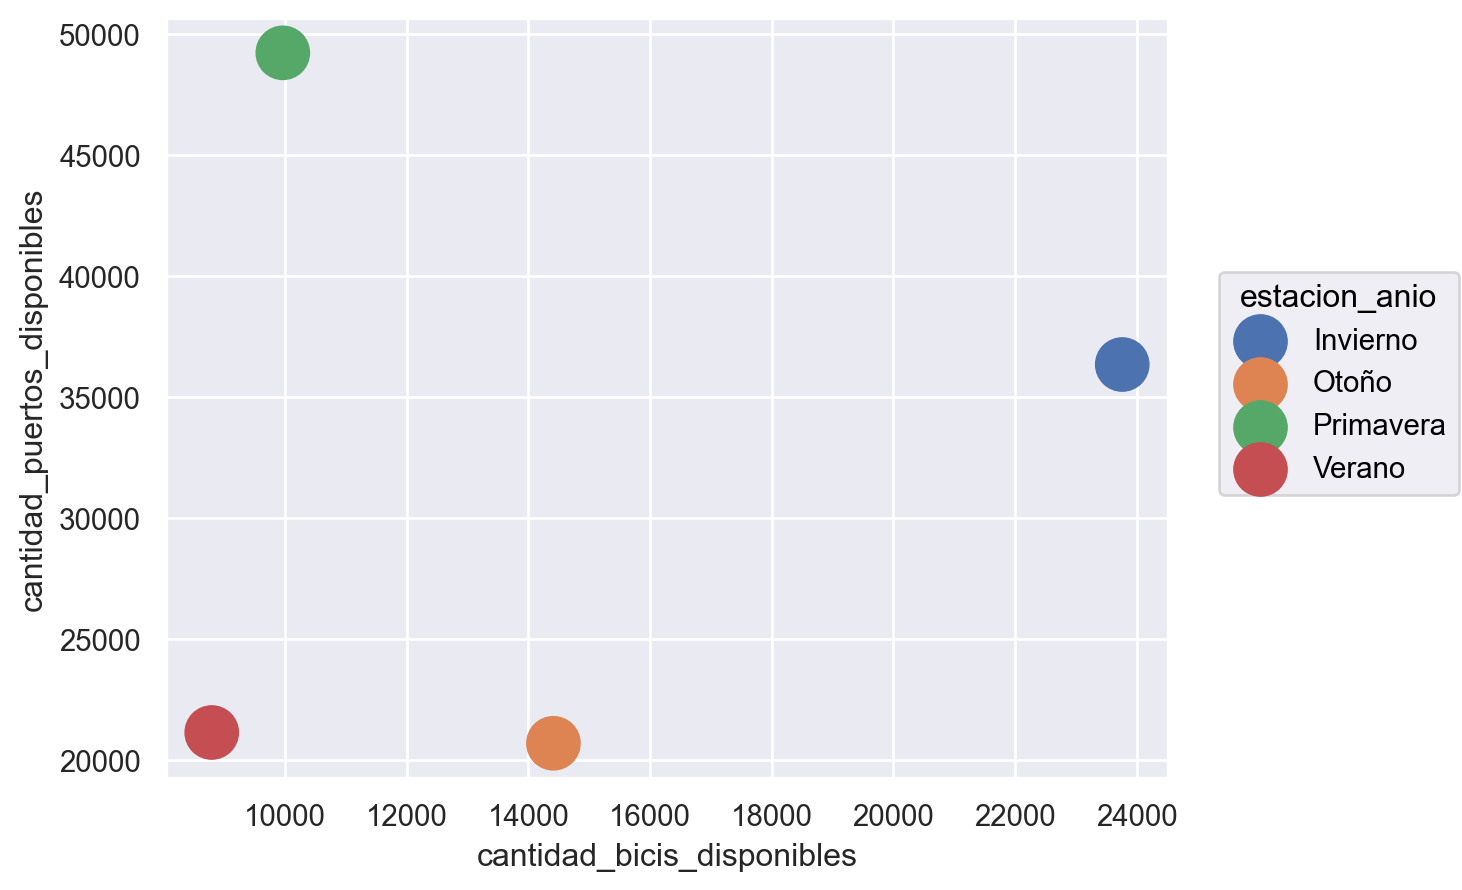

In [26]:
datos_resumidos = datos_eda_agrupados.groupby("estacion_anio", as_index=False).agg({
    "cantidad_bicis_disponibles": "sum",
    "cantidad_puertos_disponibles": "sum"
})

(
    so.Plot(
        data=datos_resumidos, 
        x="cantidad_bicis_disponibles", 
        y="cantidad_puertos_disponibles", 
        color="estacion_anio"
    )
    .add(so.Dot(pointsize=20))
)

In [53]:
# Primavera: altisima cantidad de recepción (puertos disponibles) y bajisima cantidad de bicis disponibles
# ¿Sería que hay alto uso de bicis?

# Invierno: mayor cantidad de bicis y recepción de puertos media

# Verano y otoño tienen pocos puertos sdisponibles pero pocas bicis disponibles también (¿estaciones cerradas?¿bicis rotas?)

# Incorporar cantidad_bicis_rotas a la ecuación

# bicis + puertos = ¿cantidad total?

# ¿% de ocupación bicis/total?

# razón entre bicis/puertos

# Conclusiones 10: ...

## Ejercicio 11

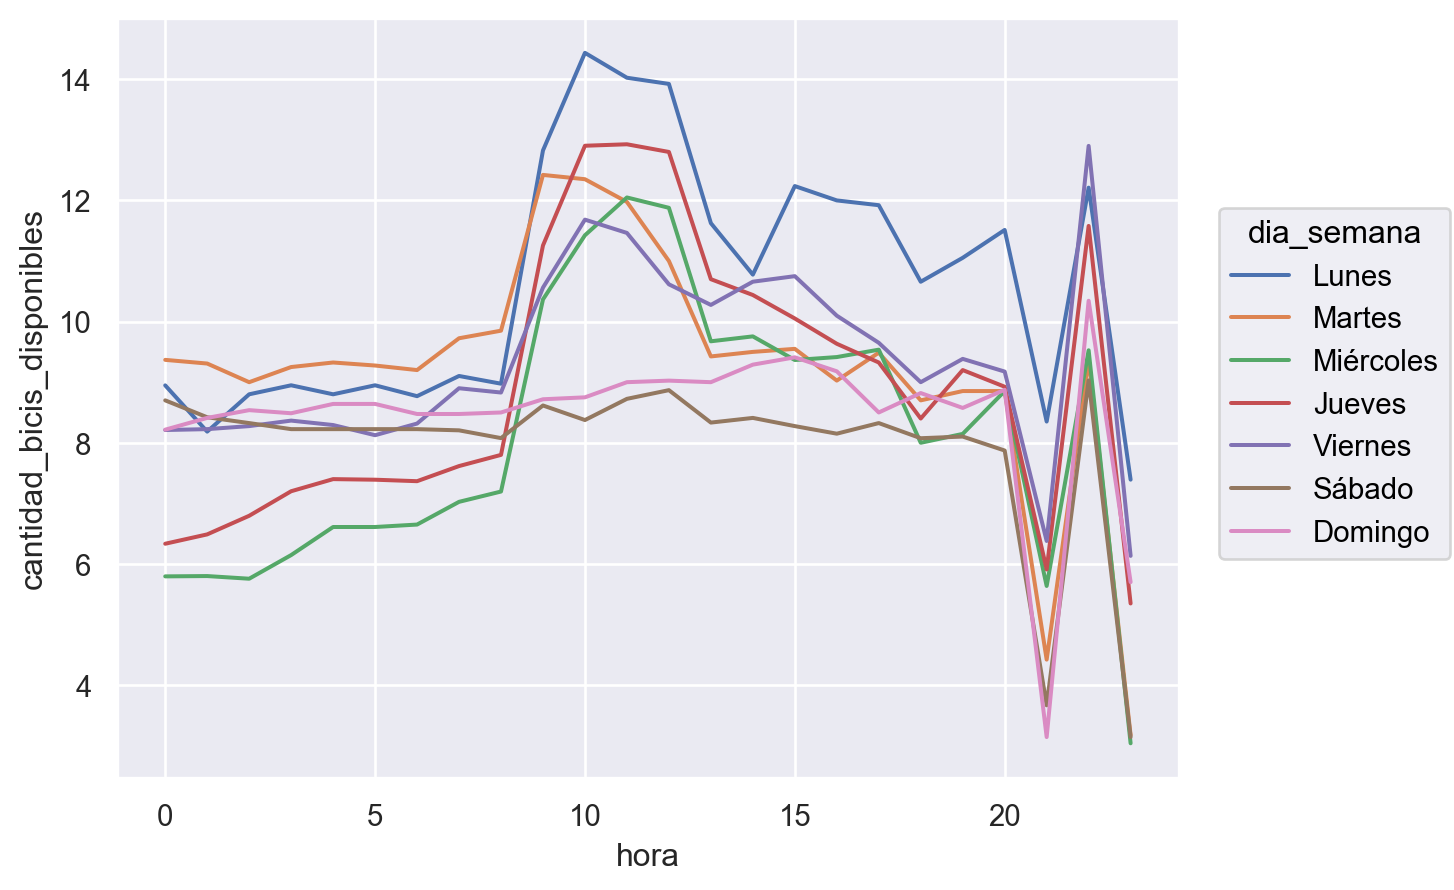

In [27]:
(
    so.Plot(datos_eda_agrupados, x="hora", y="cantidad_bicis_disponibles", color="dia_semana")
    .add(so.Line(), so.Agg("mean"))
)

# Conclusiones 11: ...

## Ejercicio 12

### Pregunta conceptual a responder

Regresi´on Lineal [2 pts.]

En esta secci´on, queremos analizar el uso de bicis en otras estaciones de la Ciudad. Para eso vamosa utilizar el dataset viajes-por-dia.csv con la cantidad de viajes por hora realizados desde cadaestaci´on y cantidad de viajes por hora realizados hacia cada estaci´on.

15. Se quiere ajustar la cantidad de viajes con origen en la estaci´on 005- Plaza Italia en funci´on de
viajes originados en otras estaciones o con destino en distintas estaciones. Es decir, queremos
hacer un modelo para ajustar la variable origen_5 en funci´on de otras variables del DataFrame.

16. Propongan tres modelos de regresi´on distintos. En cada modelo, pueden utilizarse a lo sumo 5
variables explicativas (pueden ser variables distintas en los distintos modelos). Los criterios de
selecci´on de esas 5 columnas los determinan ustedes arbitrariamente, y deben estar explicitados
en el informe.

17. Propongan un esquema de validaci´on de los modelos y utilizarlo para seleccionar el mejor de
los tres modelos propuestos.
Importante: Pueden utilizar cualquier criterios para la elecci´on de las variables de cada
modelo, no se pide buscar las 5 mejores variables entre todas las disponibles. Lo que s´ı tienen
que hacer es explicar entre los 3 modelos que proponen c´omo seleccionan el mejor de ellos.

18. Para el modelo elegido, indiquen la f´ormula final de modelo.

In [28]:
viajes_por_dia = pd.read_csv("viajes_diarios.csv")
viajes_por_dia

,fecha,origen_2,origen_3,origen_4,origen_5,origen_6,origen_7,origen_8,origen_9,origen_12,...,destino_567,destino_568,destino_569,destino_570,destino_572,destino_573,destino_574,destino_575,destino_576,destino_577
0,2024-01-01,13,24,39,45,0,27,28,32,20,...,0,0,0,0,0,0,0,0,0,0
1,2024-01-02,27,58,85,123,27,38,90,65,31,...,0,0,0,0,0,0,0,0,0,0
2,2024-01-03,40,67,65,144,33,18,113,71,39,...,0,0,0,0,0,0,0,0,0,0
3,2024-01-04,39,53,66,98,35,42,103,66,35,...,0,0,0,0,0,0,0,0,0,0
4,2024-01-05,27,63,50,84,46,28,93,60,32,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2024-12-27,25,41,72,103,40,19,81,62,36,...,17,25,31,20,15,11,27,5,33,18
362,2024-12-28,16,19,26,33,10,4,21,23,23,...,8,19,25,29,1,2,5,3,33,6
363,2024-12-29,15,17,15,83,12,8,38,35,26,...,12,23,23,27,7,4,1,1,17,9
364,2024-12-30,26,62,55,123,58,12,96,63,39,...,15,21,47,24,7,4,9,10,34,15


In [35]:
viajes_por_dia["fecha"] = pd.to_datetime(viajes_por_dia["fecha"])

In [43]:
# Reutilizamos la función determinar_estacion_anio

viajes_por_dia['estacion_anio'] = viajes_por_dia.apply(determinar_estacion_anio, axis=1)

In [44]:
viajes_por_dia

,fecha,origen_2,origen_3,origen_4,origen_5,origen_6,origen_7,origen_8,origen_9,origen_12,...,destino_569,destino_570,destino_572,destino_573,destino_574,destino_575,destino_576,destino_577,estacion_anio,dia_semana
0,2024-01-01,13,24,39,45,0,27,28,32,20,...,0,0,0,0,0,0,0,0,Verano,Lunes
1,2024-01-02,27,58,85,123,27,38,90,65,31,...,0,0,0,0,0,0,0,0,Verano,Martes
2,2024-01-03,40,67,65,144,33,18,113,71,39,...,0,0,0,0,0,0,0,0,Verano,Miércoles
3,2024-01-04,39,53,66,98,35,42,103,66,35,...,0,0,0,0,0,0,0,0,Verano,Jueves
4,2024-01-05,27,63,50,84,46,28,93,60,32,...,0,0,0,0,0,0,0,0,Verano,Viernes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2024-12-27,25,41,72,103,40,19,81,62,36,...,31,20,15,11,27,5,33,18,Verano,Viernes
362,2024-12-28,16,19,26,33,10,4,21,23,23,...,25,29,1,2,5,3,33,6,Verano,Sábado
363,2024-12-29,15,17,15,83,12,8,38,35,26,...,23,27,7,4,1,1,17,9,Verano,Domingo
364,2024-12-30,26,62,55,123,58,12,96,63,39,...,47,24,7,4,9,10,34,15,Verano,Lunes


In [ ]:

dias_en_español = {
    0: 'Lunes',
    1: 'Martes',
    2: 'Miércoles',
    3: 'Jueves',
    4: 'Viernes',
    5: 'Sábado',
    6: 'Domingo'
}

viajes_por_dia['dia_semana'] = viajes_por_dia['fecha'].dt.dayofweek.map(dias_en_español)

In [49]:
viajes_por_dia[["fecha","estacion_anio","dia_semana"]]

,fecha,estacion_anio,dia_semana
0,2024-01-01,Verano,Lunes
1,2024-01-02,Verano,Martes
2,2024-01-03,Verano,Miércoles
3,2024-01-04,Verano,Jueves
4,2024-01-05,Verano,Viernes
...,...,...,...
361,2024-12-27,Verano,Viernes
362,2024-12-28,Verano,Sábado
363,2024-12-29,Verano,Domingo
364,2024-12-30,Verano,Lunes


## 1. estacion_ anio - LISTO

## 2. dia_semana - LISTO

## 3. Clases si/no, generar columna de "época de cursada" y lógica condicional combinada con dia_semana para establecer Si/No hubo clases

## 4. Estaciones cercanas por latitud y longitud, ¿cómo? Dataset de info de cada estación, pero ¿dónde está? → Cantidad de viajes por destino

## 5. Clima (descargar de Meteosat en 2024 en Palermo y usar temperatura y precipitaciones_etiquetadas)

¿Hora del día extraída con un groupby de día-hora del dataset de EDA? Considerar día de la semana Y época del año

Además, ¿como combinamos la lógica de bicis y puertos disponibles con viajes diarios?

# Hora de última actualizacion - 09:54 AM, domingo 15 de febrero de 2026

In [51]:
datos_eda_agrupados

,fecha,hora,cantidad_bicis_disponibles,cantidad_bicis_rotas,cantidad_puertos_disponibles,dia_semana,dia,mes,anio,estacion_anio
0,2025-04-28,23,14,3,15,Lunes,28,4,2025,Otoño
1,2025-04-29,0,16,3,13,Martes,29,4,2025,Otoño
2,2025-04-29,1,16,3,13,Martes,29,4,2025,Otoño
3,2025-04-29,2,16,3,13,Martes,29,4,2025,Otoño
4,2025-04-29,3,16,3,13,Martes,29,4,2025,Otoño
...,...,...,...,...,...,...,...,...,...,...
6259,2026-02-06,11,3,3,26,Viernes,6,2,2026,Verano
6260,2026-02-06,12,4,3,25,Viernes,6,2,2026,Verano
6261,2026-02-06,14,4,3,25,Viernes,6,2,2026,Verano
6262,2026-02-06,15,4,3,25,Viernes,6,2,2026,Verano
